# Amazing Logos V4 - Step 4: Categories Filtering Analysis

This notebook analyzes the distribution of categories in metadata7.csv and provides recommendations for filtering out categories with low occurrence counts.

## Steps:
1. **Load Data**: Read `amazing_logos_v4_metadata7.csv`
2. **Category Analysis**: Count occurrences of each category
3. **Text Output**: Save sorted category counts to `step4_category4_filtering_analysis.txt`
4. **Visualizations**: Create histogram and boxplot of category counts
5. **Statistical Analysis**: Use IQR and other metrics to recommend filtering thresholds
6. **Recommendations**: Provide clear guidance on which categories to exclude

## Outputs:
- `step4_category4_filtering_analysis.txt`: Detailed category count analysis
- Histogram and boxplot visualizations
- Statistical recommendations for filtering thresholds

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import sys
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

# Add utils folder to path  
utils_path = Path('../../utils')
sys.path.append(str(utils_path))

# Import consolidation functions
from consolidation import consolidate_categories, normalize_category, consolidation_map

# Paths
input_metadata_csv = Path('../../output/amazing_logos_v4/data/amazing_logos_v4_cleanup/metadata7.csv')
output_analysis_txt = Path('../../output/amazing_logos_v4/data/amazing_logos_v4_cleanup/category4_filtering_analysis.txt')
output_metadata8_csv = Path('../../output/amazing_logos_v4/data/amazing_logos_v4_cleanup/metadata8.csv')

print(f"Input metadata CSV: {input_metadata_csv}")
print(f"Output analysis text: {output_analysis_txt}")
print(f"Output metadata CSV: {output_metadata8_csv}")

# Check if metadata input exists
if not input_metadata_csv.exists():
    print(f"ERROR: Input file {input_metadata_csv} does not exist!")
    print("Please run previous steps to create metadata7.csv.")
else:
    print(f"✓ Input metadata file exists.")

Input metadata CSV: ..\..\output\amazing_logos_v4\data\amazing_logos_v4_cleanup\metadata7.csv
Output analysis text: ..\..\output\amazing_logos_v4\data\amazing_logos_v4_cleanup\category4_filtering_analysis.txt
Output metadata CSV: ..\..\output\amazing_logos_v4\data\amazing_logos_v4_cleanup\metadata8.csv
✓ Input metadata file exists.


In [2]:
# Step 1: Load metadata and basic analysis
print("=== Step 1: Loading metadata7.csv ===")

# Load the metadata
df = pd.read_csv(input_metadata_csv)
print(f"Loaded {len(df):,} rows")
print(f"Columns: {list(df.columns)}")

# Basic info about the dataset
print(f"\nDataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Check for missing values in category column
if 'category' in df.columns:
    print(f"\nCategory column analysis:")
    print(f"  Total rows: {len(df):,}")
    print(f"  Non-null categories: {df['category'].notna().sum():,}")
    print(f"  Null categories: {df['category'].isna().sum():,}")
    print(f"  Unique categories: {df['category'].nunique():,}")
else:
    print("ERROR: 'category' column not found!")
    print(f"Available columns: {list(df.columns)}")

# Show first few rows
print(f"\nFirst 5 rows:")
print(df.head())

=== Step 1: Loading metadata7.csv ===
Loaded 393,298 rows
Columns: ['id', 'company', 'description', 'category', 'tags']

Dataset shape: (393298, 5)
Memory usage: 194.76 MB

Category column analysis:
  Total rows: 393,298
  Non-null categories: 393,298
  Null categories: 0
Loaded 393,298 rows
Columns: ['id', 'company', 'description', 'category', 'tags']

Dataset shape: (393298, 5)
Memory usage: 194.76 MB

Category column analysis:
  Total rows: 393,298
  Non-null categories: 393,298
  Null categories: 0
  Unique categories: 32,688

First 5 rows:
                      id                                    company  \
0  amazing_logo_v4000000  Simple elegant logo for Mandarin Oriental   
1  amazing_logo_v4000001               Simple elegant logo for Alfa   
2  amazing_logo_v4000002            Simple elegant logo for Kuraray   
3  amazing_logo_v4000003       Simple elegant logo for Valwood Park   
4  amazing_logo_v4000004            Simple elegant logo for Cinepaq   

                      

In [5]:
# Step 2: Count categories and create text output
print("=== Step 2: Category Count Analysis ===")

# Import datetime for timestamp
from datetime import datetime

# Count occurrences of each category
category_counts = df['category'].value_counts().sort_values(ascending=False)
print(f"Found {len(category_counts)} unique categories")

# Basic statistics
print(f"\nCategory count statistics:")
print(f"  Total logos: {category_counts.sum():,}")
print(f"  Most frequent category: '{category_counts.index[0]}' with {category_counts.iloc[0]:,} logos")
print(f"  Least frequent category: '{category_counts.index[-1]}' with {category_counts.iloc[-1]:,} logos")
print(f"  Median count: {category_counts.median():.1f}")
print(f"  Mean count: {category_counts.mean():.1f}")

# Show top and bottom categories
print(f"\nTop 10 categories:")
for i, (category, count) in enumerate(category_counts.head(10).items(), 1):
    print(f"  {i:2d}. {category:<30} {count:>6,} logos")

print(f"\nBottom 10 categories:")
for i, (category, count) in enumerate(category_counts.tail(10).items(), 1):
    print(f"  {i:2d}. {category:<30} {count:>6,} logos")

# Create detailed text output
print(f"\n=== Creating text output: {output_analysis_txt} ===")

with open(output_analysis_txt, 'w', encoding='utf-8') as f:
    f.write("Amazing Logos V4 - Category Filtering Analysis\n")
    f.write("=" * 50 + "\n")
    f.write(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"Source: {input_metadata_csv.name}\n\n")
    
    f.write(f"SUMMARY STATISTICS\n")
    f.write("-" * 20 + "\n")
    f.write(f"Total logos: {category_counts.sum():,}\n")
    f.write(f"Unique categories: {len(category_counts):,}\n")
    f.write(f"Mean count per category: {category_counts.mean():.2f}\n")
    f.write(f"Median count per category: {category_counts.median():.1f}\n")
    f.write(f"Standard deviation: {category_counts.std():.2f}\n")
    f.write(f"Min count: {category_counts.min():,}\n")
    f.write(f"Max count: {category_counts.max():,}\n\n")
    
    f.write(f"COMPLETE CATEGORY LIST (sorted by count)\n")
    f.write("-" * 40 + "\n")
    f.write(f"{'Rank':<6} {'Category':<40} {'Count':<8} {'Percentage':<10}\n")
    f.write("-" * 70 + "\n")
    
    total_logos = category_counts.sum()
    for rank, (category, count) in enumerate(category_counts.items(), 1):
        percentage = (count / total_logos) * 100
        f.write(f"{rank:<6} {category:<40} {count:<8,} {percentage:<10.2f}%\n")

print(f"✓ Text analysis saved to {output_analysis_txt}")
print(f"File size: {output_analysis_txt.stat().st_size:,} bytes")

=== Step 2: Category Count Analysis ===
Found 32688 unique categories

Category count statistics:
  Total logos: 393,298
  Most frequent category: 'unclassified' with 29,442 logos
  Least frequent category: 'fishing_and_hunting' with 1 logos
  Median count: 1.0
  Mean count: 12.0

Top 10 categories:
   1. unclassified                   29,442 logos
   2. sports_recreation              11,383 logos
   3. restaurant_dining              10,963 logos
   4. real_estate_residential        10,825 logos
   5. healthcare_general             10,534 logos
   6. design_creative                10,366 logos
   7. nonprofit_charity              10,134 logos
   8. fashion_apparel                 9,174 logos
   9. education_k12                   8,572 logos
  10. food                            7,866 logos

Bottom 10 categories:
   1. ski_surf_shop                       1 logos
   2. music_chart_award                   1 logos
   3. all_natural_causual_dining_restaurant      1 logos
   4. cabon_emissio

=== TOP-DOWN CUMULATIVE ANALYSIS ===
Total dataset: 32,688 categories, 393,298 logos

CUMULATIVE COVERAGE ANALYSIS:
Target   Categories   % Categories   Logos Kept   Logos Lost   Min Count  Threshold Category
----------------------------------------------------------------------------------------------------
90%      2,227        6.8            353,969      39,329       3          airline_company
95%      13,024       39.8           373,634      19,664       1          technological
99%      28,756       88.0           389,366      3,932        1          overdenture_attachments

DETAILED BREAKDOWN:

--- 90% LOGO RETENTION ---
Keep top 2,227 categories (out of 32,688)
Remove bottom 30,461 categories
Minimum count threshold: ≥3 logos per category
Last category to keep: 'airline_company' with 3 logos
Data retention: 353,969 logos (90%)
Data loss: 39,329 logos (10%)

--- 95% LOGO RETENTION ---
Keep top 13,024 categories (out of 32,688)
Remove bottom 19,664 categories
Minimum count thresho

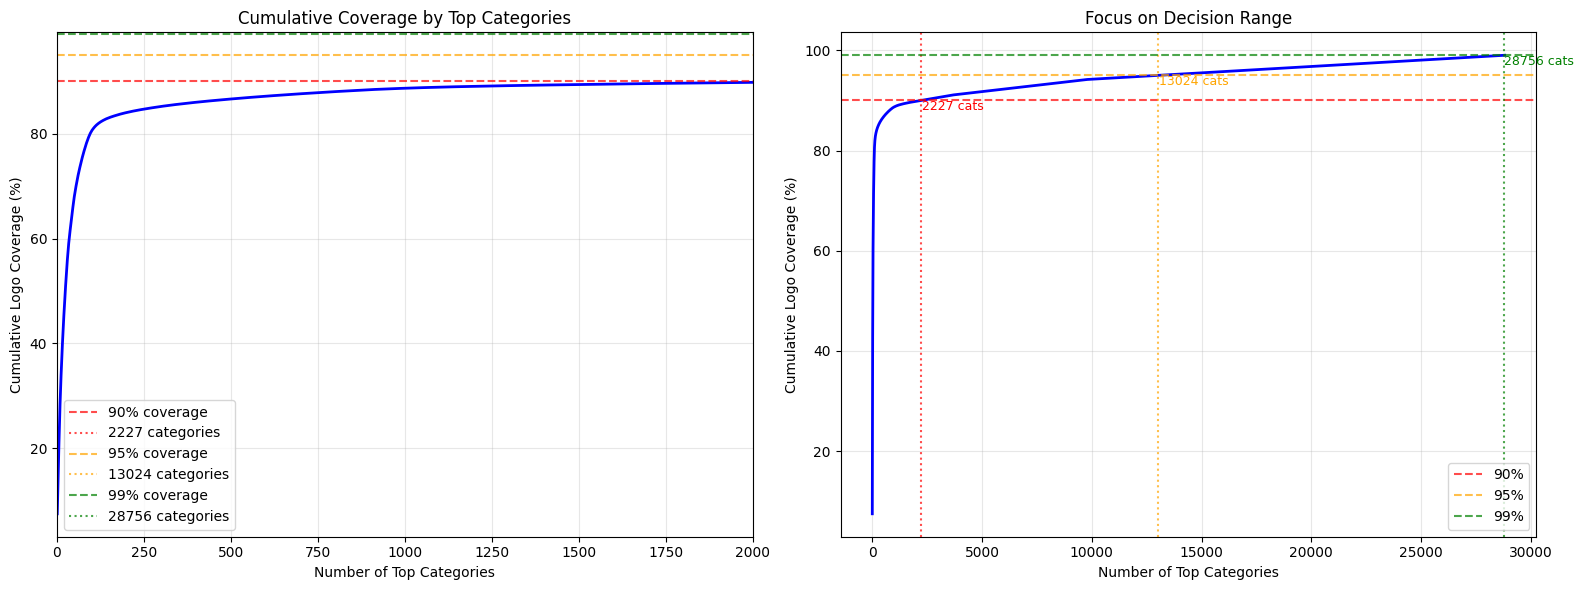

In [6]:
# TOP-DOWN ANALYSIS: How many categories needed to keep 90%, 95%, 99% of logos
print("=== TOP-DOWN CUMULATIVE ANALYSIS ===")

# Sort categories by count (descending) and calculate cumulative coverage
category_counts_sorted = category_counts.sort_values(ascending=False)
cumulative_logos = category_counts_sorted.cumsum()
cumulative_percentage = (cumulative_logos / category_counts.sum()) * 100

total_categories = len(category_counts)
total_logos = category_counts.sum()

print(f"Total dataset: {total_categories:,} categories, {total_logos:,} logos")
print()

# Analysis for different retention targets
retention_targets = [90, 95, 99]
print("CUMULATIVE COVERAGE ANALYSIS:")
print(f"{'Target':<8} {'Categories':<12} {'% Categories':<14} {'Logos Kept':<12} {'Logos Lost':<12} {'Min Count':<10} {'Threshold Category'}")
print("-" * 100)

results = {}
for target in retention_targets:
    # Find first category that reaches the target coverage
    mask = cumulative_percentage >= target
    if mask.any():
        threshold_category = mask.idxmax()  # First category that reaches target
        categories_needed = category_counts_sorted.index.get_loc(threshold_category) + 1
        
        logos_kept = cumulative_logos.loc[threshold_category]
        logos_lost = total_logos - logos_kept
        min_count = category_counts_sorted.loc[threshold_category]
        percent_categories = (categories_needed / total_categories) * 100
        
        results[target] = {
            'categories_needed': categories_needed,
            'logos_kept': logos_kept,
            'logos_lost': logos_lost,
            'min_count': min_count,
            'threshold_category': threshold_category,
            'categories_removed': total_categories - categories_needed
        }
        
        print(f"{target}%{'':<5} {categories_needed:<12,} {percent_categories:<14.1f} {logos_kept:<12,} {logos_lost:<12,} {min_count:<10} {threshold_category}")

print("\nDETAILED BREAKDOWN:")
for target in retention_targets:
    r = results[target]
    print(f"\n--- {target}% LOGO RETENTION ---")
    print(f"Keep top {r['categories_needed']:,} categories (out of {total_categories:,})")
    print(f"Remove bottom {r['categories_removed']:,} categories")
    print(f"Minimum count threshold: ≥{r['min_count']} logos per category")
    print(f"Last category to keep: '{r['threshold_category']}' with {r['min_count']} logos")
    print(f"Data retention: {r['logos_kept']:,} logos ({target}%)")
    print(f"Data loss: {r['logos_lost']:,} logos ({100-target}%)")

# Show the categories around each threshold
print("\n=== CATEGORIES AROUND THRESHOLDS ===")
for target in retention_targets:
    r = results[target]
    categories_to_keep = category_counts_sorted.head(r['categories_needed'])
    
    print(f"\n{target}% Threshold - Last 5 categories to KEEP:")
    for i, (category, count) in enumerate(categories_to_keep.tail(5).items()):
        pos = categories_to_keep.index.get_loc(category) + 1
        print(f"  {pos:4d}. {category:<50} {count:>6,} logos")
    
    # First few categories to remove
    categories_to_remove = category_counts_sorted.tail(r['categories_removed'])
    categories_to_remove_desc = categories_to_remove.sort_values(ascending=False)
    print(f"     First 5 categories to REMOVE:")
    for i, (category, count) in enumerate(categories_to_remove_desc.head(5).items()):
        pos = category_counts_sorted.index.get_loc(category) + 1
        print(f"  {pos:4d}. {category:<50} {count:>6,} logos")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Cumulative coverage curve
categories_range = range(1, len(category_counts_sorted) + 1)
show_first = min(2000, len(categories_range))  # Show first 2000 categories
ax1.plot(categories_range[:show_first], cumulative_percentage.iloc[:show_first], 'b-', linewidth=2)

# Add threshold lines
colors = ['red', 'orange', 'green']
for i, target in enumerate(retention_targets):
    r = results[target]
    ax1.axhline(y=target, color=colors[i], linestyle='--', alpha=0.7, label=f'{target}% coverage')
    ax1.axvline(x=r['categories_needed'], color=colors[i], linestyle=':', alpha=0.7, label=f'{r["categories_needed"]} categories')

ax1.set_xlabel('Number of Top Categories')
ax1.set_ylabel('Cumulative Logo Coverage (%)')
ax1.set_title('Cumulative Coverage by Top Categories')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xlim(0, show_first)

# Plot 2: Focus on the decision range
focus_start = 0
focus_end = max([r['categories_needed'] for r in results.values()]) + 50
ax2.plot(categories_range[focus_start:focus_end], cumulative_percentage.iloc[focus_start:focus_end], 'b-', linewidth=2)

for i, target in enumerate(retention_targets):
    r = results[target]
    ax2.axhline(y=target, color=colors[i], linestyle='--', alpha=0.7, label=f'{target}%')
    ax2.axvline(x=r['categories_needed'], color=colors[i], linestyle=':', alpha=0.7)
    # Add text annotation
    ax2.annotate(f'{r["categories_needed"]} cats', 
                xy=(r['categories_needed'], target), 
                xytext=(r['categories_needed']+20, target-2),
                fontsize=9, color=colors[i])

ax2.set_xlabel('Number of Top Categories')
ax2.set_ylabel('Cumulative Logo Coverage (%)')
ax2.set_title('Focus on Decision Range')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

In [7]:
# FILTERING IMPLEMENTATION: Remove categories with less than 4 logos
print("=== FILTERING IMPLEMENTATION ===")

# Define the threshold
min_count_threshold = 4
output_metadata8_csv = Path('../../output/amazing_logos_v4/data/amazing_logos_v4_cleanup/metadata8.csv')

print(f"Filtering threshold: Remove categories with <{min_count_threshold} logos")
print(f"Output file: {output_metadata8_csv}")
print()

# Find categories to keep (≥4 logos)
categories_to_keep = category_counts[category_counts >= min_count_threshold]
categories_to_remove = category_counts[category_counts < min_count_threshold]

print(f"BEFORE FILTERING:")
print(f"  Total categories: {len(category_counts):,}")
print(f"  Total logos: {len(df):,}")
print()

print(f"FILTERING ANALYSIS:")
print(f"  Categories to keep (≥{min_count_threshold} logos): {len(categories_to_keep):,}")
print(f"  Categories to remove (<{min_count_threshold} logos): {len(categories_to_remove):,}")
print(f"  Logos in categories to keep: {categories_to_keep.sum():,}")
print(f"  Logos in categories to remove: {categories_to_remove.sum():,}")
print()

# Apply the filter
print("Applying filter...")
df_filtered = df[df['category'].isin(categories_to_keep.index)]

print(f"AFTER FILTERING:")
print(f"  Remaining categories: {df_filtered['category'].nunique():,}")
print(f"  Remaining logos: {len(df_filtered):,}")
print(f"  Data retention: {(len(df_filtered) / len(df)) * 100:.2f}%")
print(f"  Categories removed: {len(category_counts) - df_filtered['category'].nunique():,}")
print(f"  Logos removed: {len(df) - len(df_filtered):,}")
print()

# Verify the filtering worked correctly
print("VERIFICATION:")
filtered_category_counts = df_filtered['category'].value_counts()
min_count_in_filtered = filtered_category_counts.min()
print(f"  Minimum count in filtered data: {min_count_in_filtered}")
print(f"  All categories have ≥{min_count_threshold} logos: {min_count_in_filtered >= min_count_threshold}")
print()

# Show some statistics about the filtered data
print("FILTERED DATA STATISTICS:")
print(f"  Mean logos per category: {filtered_category_counts.mean():.1f}")
print(f"  Median logos per category: {filtered_category_counts.median():.1f}")
print(f"  Max logos per category: {filtered_category_counts.max():,}")
print()

# Show top categories in filtered data
print("Top 10 categories in filtered data:")
for i, (category, count) in enumerate(filtered_category_counts.head(10).items(), 1):
    print(f"  {i:2d}. {category:<40} {count:>6,} logos")
print()

# Save the filtered data
print(f"Saving filtered data to {output_metadata8_csv}...")
df_filtered.to_csv(output_metadata8_csv, index=False)

# Verify the save
if output_metadata8_csv.exists():
    file_size = output_metadata8_csv.stat().st_size
    print(f"✓ Successfully saved metadata8.csv")
    print(f"  File size: {file_size:,} bytes")
    print(f"  Reduction from metadata7: {((file_size / input_metadata_csv.stat().st_size) * 100):.1f}% of original size")
else:
    print("✗ Error: Failed to save metadata8.csv")

print()
print("SUMMARY:")
print(f"  Original: {len(df):,} logos, {len(category_counts):,} categories")
print(f"  Filtered: {len(df_filtered):,} logos, {df_filtered['category'].nunique():,} categories")
print(f"  Removed: {len(df) - len(df_filtered):,} logos, {len(category_counts) - df_filtered['category'].nunique():,} categories")
print(f"  Threshold used: Categories with ≥{min_count_threshold} logos kept")
print(f"  Data retention: {(len(df_filtered) / len(df)) * 100:.2f}%")

# Update the analysis text file with the filtering results
with open(output_analysis_txt, 'a', encoding='utf-8') as f:
    f.write(f"\n\nFILTERING RESULTS\n")
    f.write("=" * 20 + "\n")
    f.write(f"Threshold applied: Remove categories with <{min_count_threshold} logos\n")
    f.write(f"Original data: {len(df):,} logos, {len(category_counts):,} categories\n")
    f.write(f"Filtered data: {len(df_filtered):,} logos, {df_filtered['category'].nunique():,} categories\n")
    f.write(f"Data retention: {(len(df_filtered) / len(df)) * 100:.2f}%\n")
    f.write(f"Output file: {output_metadata8_csv.name}\n")

print(f"\n✓ Filtering complete! Results saved to {output_metadata8_csv}")

=== FILTERING IMPLEMENTATION ===
Filtering threshold: Remove categories with <4 logos
Output file: ..\..\output\amazing_logos_v4\data\amazing_logos_v4_cleanup\metadata8.csv

BEFORE FILTERING:
  Total categories: 32,688
  Total logos: 393,298

FILTERING ANALYSIS:
  Categories to keep (≥4 logos): 1,622
  Categories to remove (<4 logos): 31,066
  Logos in categories to keep: 352,154
  Logos in categories to remove: 41,144

Applying filter...
AFTER FILTERING:
  Remaining categories: 1,622
  Remaining logos: 352,154
  Data retention: 89.54%
  Categories removed: 31,066
  Logos removed: 41,144

VERIFICATION:
  Minimum count in filtered data: 4
  All categories have ≥4 logos: True

FILTERED DATA STATISTICS:
  Mean logos per category: 217.1
  Median logos per category: 15.0
  Max logos per category: 29,442

Top 10 categories in filtered data:
   1. unclassified                             29,442 logos
   2. sports_recreation                        11,383 logos
   3. restaurant_dining          